In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./fcc-forum-pageviews.csv", parse_dates=['date'], index_col='date')
print(df.head())

            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933


In [5]:
# Filter out the top and bottom 2.5% of page views
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)
# Keep only the data within the 2.5%–97.5% range
df_cleaned = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

# Display the cleaned DataFrame
print(df_cleaned.head())

            value
date             
2016-05-19  19736
2016-05-26  18060
2016-05-27  19997
2016-05-28  19044
2016-05-29  20325


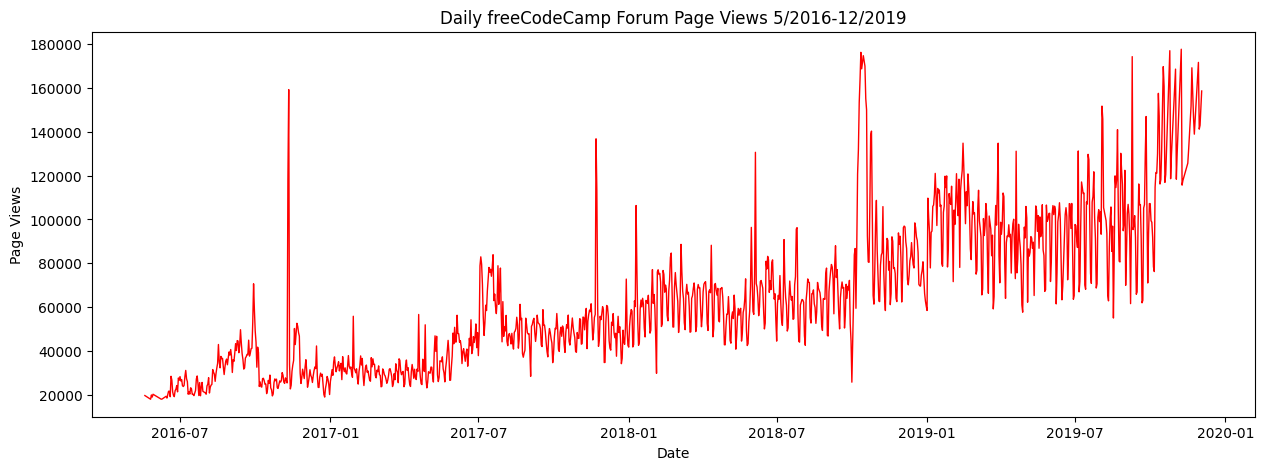

In [7]:

# Assuming df is already loaded and cleaned as df_cleaned

def draw_line_plot():
    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df_cleaned.index, df_cleaned['value'], color='red', linewidth=1)

    # Set title and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Return the figure
    return fig

# Example call
fig = draw_line_plot()
plt.show()


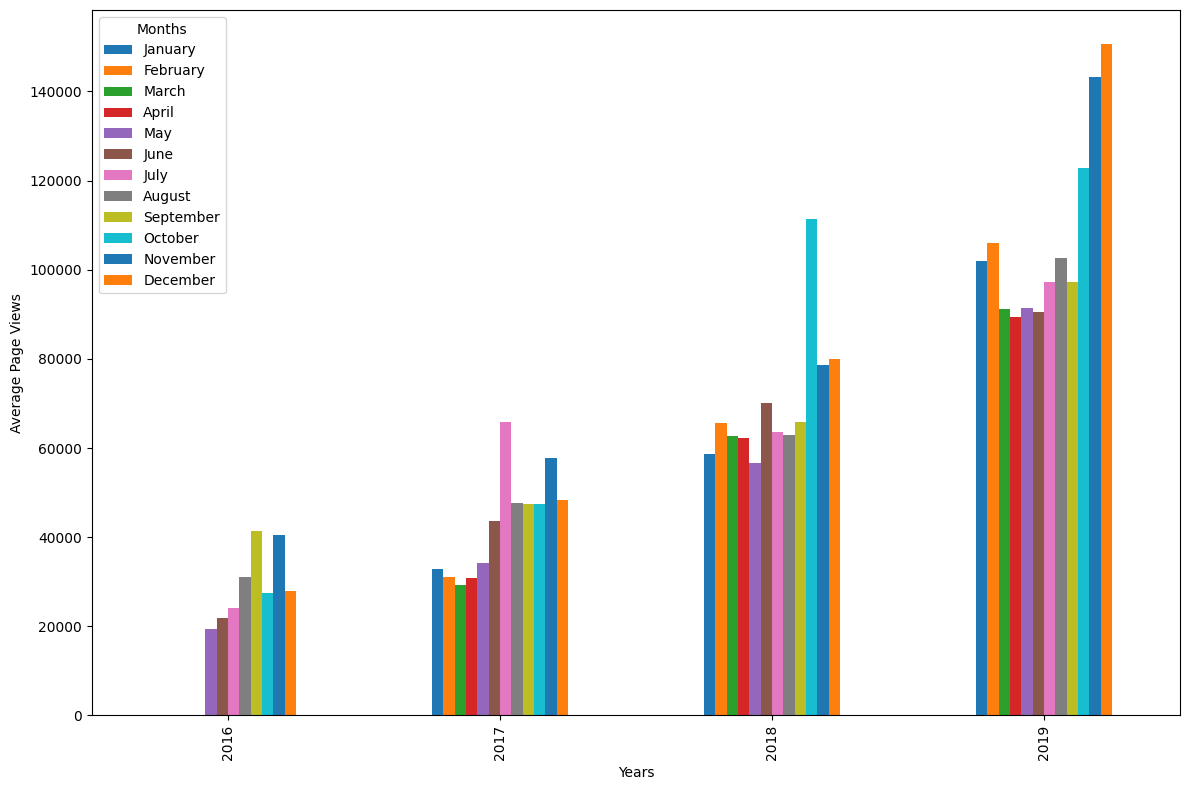

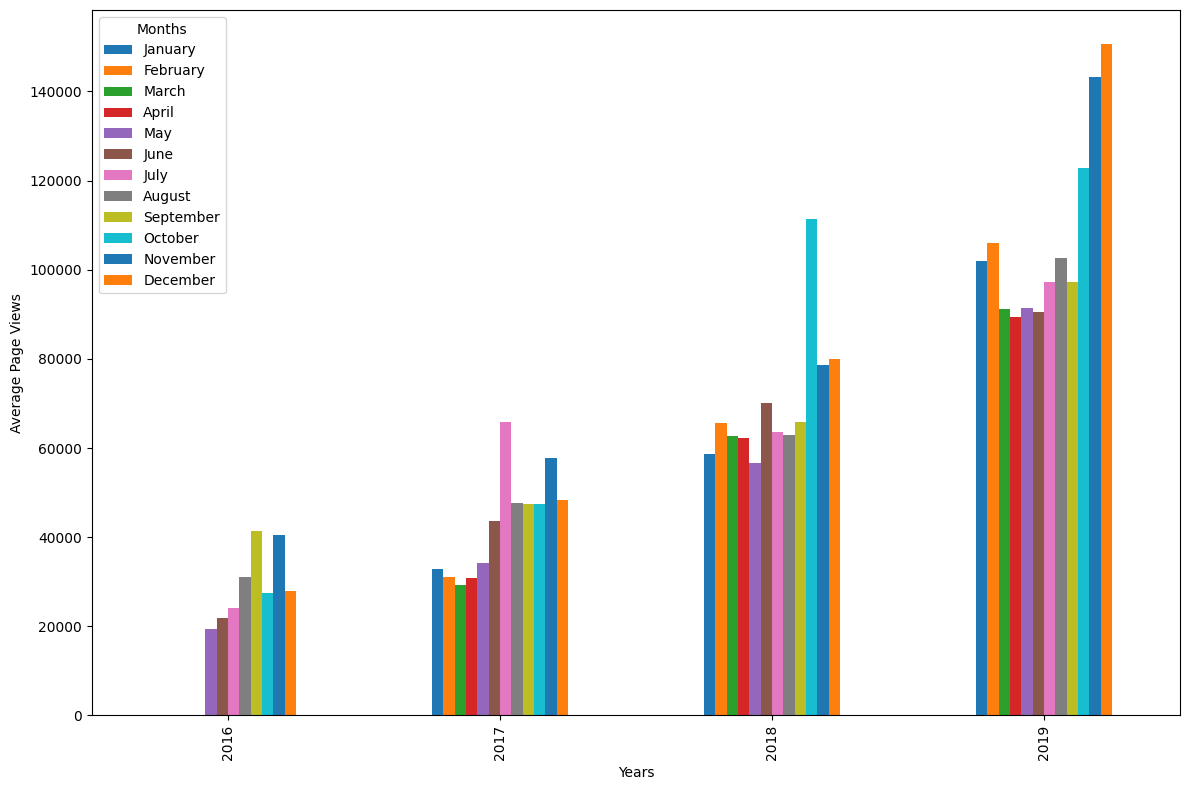

In [10]:
def draw_bar_plot():
    # Copy and prepare data
    df_bar = df_cleaned.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    # Group data and reshape
    df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Reorder months correctly
    month_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    df_grouped = df_grouped[month_order]

    # Plot
    fig = df_grouped.plot(kind='bar', figsize=(12, 8)).figure
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title='Months')
    plt.tight_layout()

    return fig

draw_bar_plot()

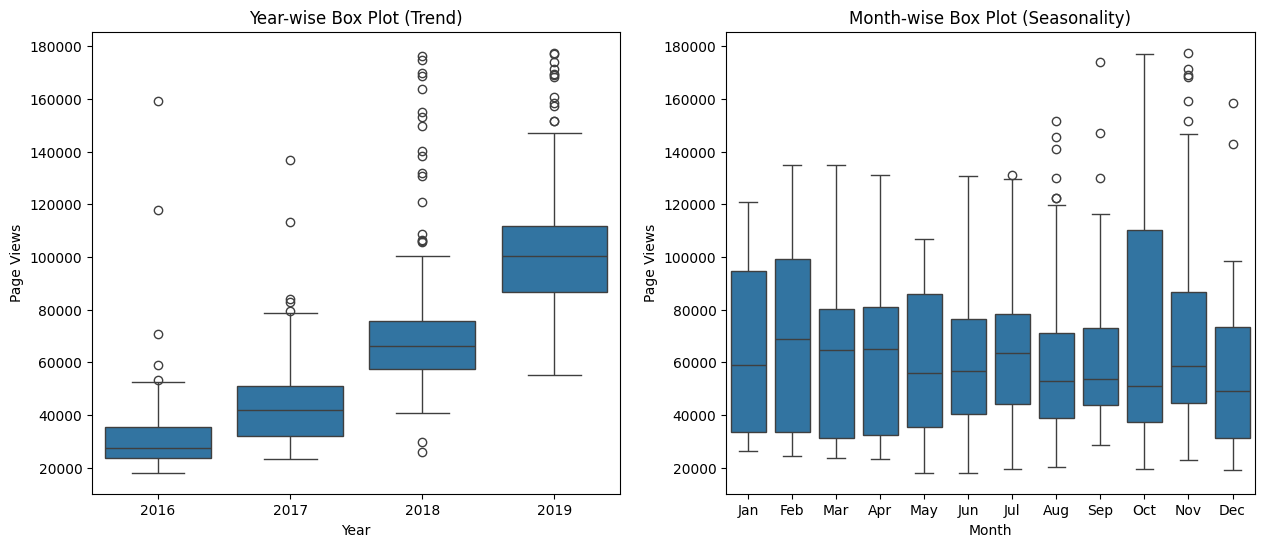

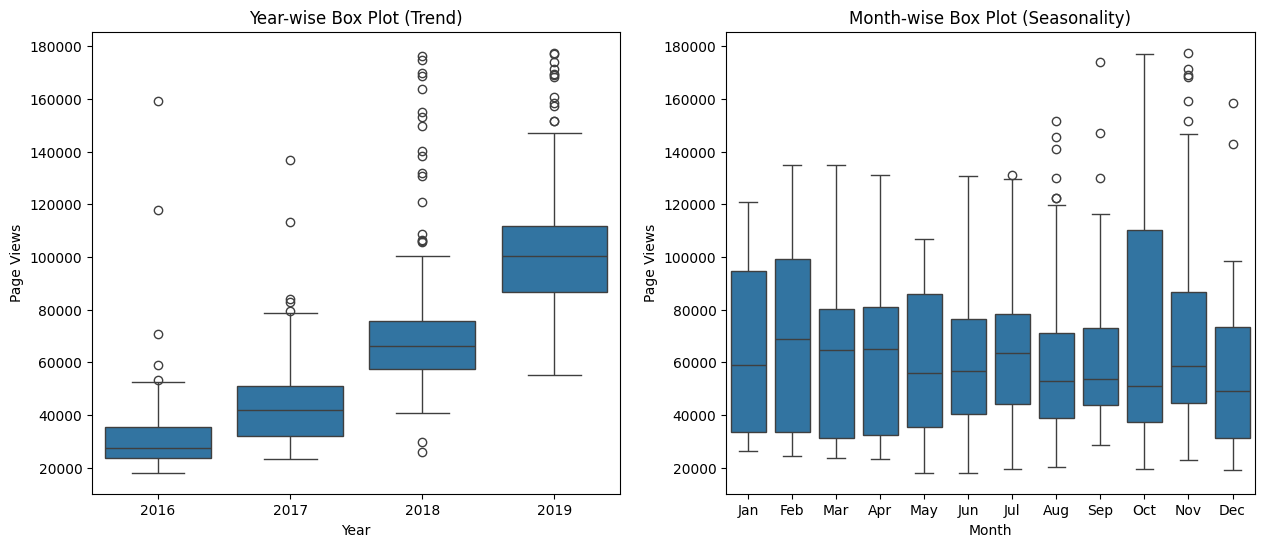

In [11]:
def draw_box_plot():
    # Import data
    df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")

    # Clean data by removing top and bottom 2.5% of page views
    df = df[
        (df["value"] >= df["value"].quantile(0.025)) &
        (df["value"] <= df["value"].quantile(0.975))
    ]

    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box["year"] = df_box["date"].dt.year
    df_box["month"] = df_box["date"].dt.strftime("%b")
    df_box["month_num"] = df_box["date"].dt.month

    # Sort months properly
    df_box = df_box.sort_values("month_num")

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Year-wise boxplot (Trend)
    sns.boxplot(x="year", y="value", data=df_box, ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    # Month-wise boxplot (Seasonality)
    sns.boxplot(x="month", y="value", data=df_box, ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    return fig

draw_box_plot()